In [9]:
!pip install matplotlib numpy pyomo pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 3.4 MB/s eta 0:00:00a 0:00:01


In [36]:
%matplotlib inline
from STN import STN

# create instance
stn = STN()

# states
stn.state('FeedA',     init = 200)
stn.state('FeedB',     init = 200)
stn.state('FeedC',     init = 200)
stn.state('HotA',      price = -1, storage_cost=1)
stn.state('IntAB',     price = -1)
stn.state('IntBC',     price = -1)
stn.state('ImpureE',   price = -1)
stn.state('Product_1', price = 10)
stn.state('Product_2', price = 10)

# state to task arcs
stn.stArc('FeedA',   'Heating')
stn.stArc('FeedB',   'Reaction_1', rho = 0.5) # input feed fractions
stn.stArc('FeedC',   'Reaction_1', rho = 0.5)
stn.stArc('HotA',    'Reaction_2', rho = 0.4)
stn.stArc('IntBC',   'Reaction_2', rho = 0.6)
stn.stArc('FeedC',   'Reaction_3', rho = 0.2)
stn.stArc('IntAB',   'Reaction_3', rho = 0.8)
stn.stArc('ImpureE', 'Separation')

# task to state arcs
stn.tsArc('Heating',    'HotA',      rho = 1.0, dur = 1)
stn.tsArc('Reaction_1', 'IntBC',     dur = 2)
stn.tsArc('Reaction_2', 'IntAB',     rho = 0.6, dur = 2)
stn.tsArc('Reaction_2', 'Product_1', rho = 0.4, dur = 2)
stn.tsArc('Reaction_3', 'ImpureE',   dur = 1)
stn.tsArc('Separation', 'IntAB',     rho = 0.1, dur = 2)
stn.tsArc('Separation', 'Product_2', rho = 0.9, dur = 1)

# unit-task data
stn.unit('Heater',    'Heating',    Bmin = 0, Bmax = 100) # min,max capacity of unit for task
stn.unit('Reactor_1', 'Reaction_1', Bmin = 0, Bmax =  80)
stn.unit('Reactor_1', 'Reaction_2', Bmin = 0, Bmax =  80)
stn.unit('Reactor_1', 'Reaction_3', Bmin = 0, Bmax =  80)
stn.unit('Reactor_2', 'Reaction_1', Bmin = 0, Bmax =  50)
stn.unit('Reactor_2', 'Reaction_2', Bmin = 0, Bmax =  50)
stn.unit('Reactor_2', 'Reaction_3', Bmin = 0, Bmax =  50)
stn.unit('Still',     'Separation', Bmin = 0, Bmax = 200)

H = 10
stn.build(range(0,H+1))
stn.solve('gurobi_persistent')

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x587
  Lower bound: 2744.375
  Upper bound: 2744.375
  Number of objectives: 1
  Number of constraints: 411
  Number of variables: 323
  Number of binary variables: 88
  Number of integer variables: 88
  Number of continuous variables: 235
  Number of nonzeros: 1170
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to opt

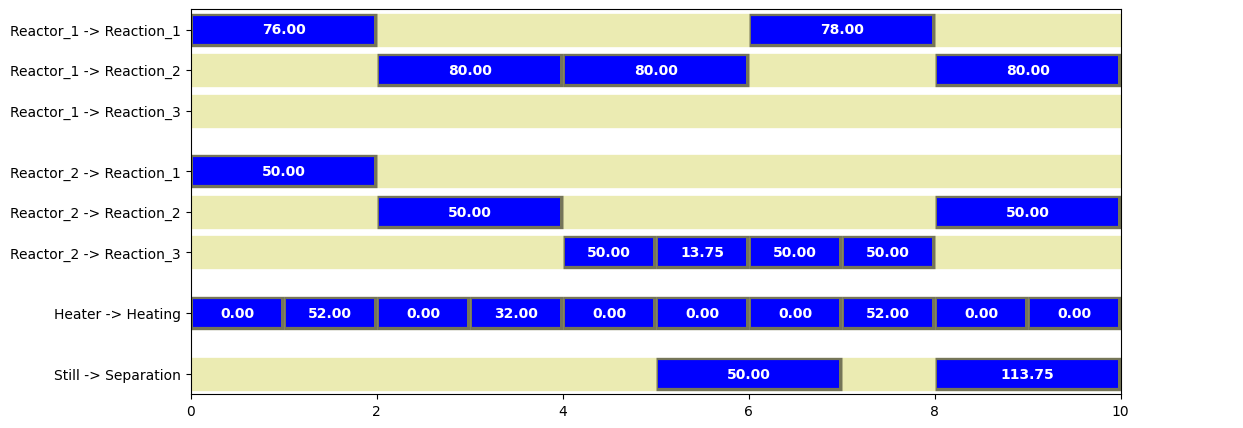

In [37]:
import matplotlib.pyplot as plt
stn.gantt()
plt.savefig('./images/output.png')

In [29]:
stn.trace()


Starting Conditions

    Initial State Inventories are:
        FeedC        200.0 kg
        Product_2      0.0 kg
        HotA           0.0 kg
        IntBC          0.0 kg
        ImpureE        0.0 kg
        Product_1      0.0 kg
        FeedB        200.0 kg
        IntAB          0.0 kg
        FeedA        200.0 kg

Time = 0 hr

    1. Assign Reactor_1 to Reaction_1 for 76.00 kg batch for 2.0 hours
    2. Transfer 38.00 from FeedC to Reactor_1
    3. Transfer 38.00 from FeedB to Reactor_1
    4. Assign Reactor_2 to Reaction_1 for 50.00 kg batch for 2.0 hours
    5. Transfer 25.00 from FeedC to Reactor_2
    6. Transfer 25.00 from FeedB to Reactor_2

    State Inventories are now:
        FeedC        137.0 kg
        Product_2      0.0 kg
        HotA           0.0 kg
        IntBC          0.0 kg
        ImpureE        0.0 kg
        Product_1      0.0 kg
        FeedB        137.0 kg
        IntAB          0.0 kg
        FeedA        200.0 kg

    Unit Assignments are now:


In [7]:
stn.mprint()

15 Set Declarations
    B_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain                        : Size : Members
        None :     3 : B_index_0*B_index_1*B_index_2 :  220 : {('Heating', 'Heater', 0), ('Heating', 'Heater', 1), ('Heating', 'Heater', 2), ('Heating', 'Heater', 3), ('Heating', 'Heater', 4), ('Heating', 'Heater', 5), ('Heating', 'Heater', 6), ('Heating', 'Heater', 7), ('Heating', 'Heater', 8), ('Heating', 'Heater', 9), ('Heating', 'Heater', 10), ('Heating', 'Reactor_1', 0), ('Heating', 'Reactor_1', 1), ('Heating', 'Reactor_1', 2), ('Heating', 'Reactor_1', 3), ('Heating', 'Reactor_1', 4), ('Heating', 'Reactor_1', 5), ('Heating', 'Reactor_1', 6), ('Heating', 'Reactor_1', 7), ('Heating', 'Reactor_1', 8), ('Heating', 'Reactor_1', 9), ('Heating', 'Reactor_1', 10), ('Heating', 'Reactor_2', 0), ('Heating', 'Reactor_2', 1), ('Heating', 'Reactor_2', 2), ('Heating', 'Reactor_2', 3), ('Heating', 'Reactor_2', 4), ('Heating', 'Reactor_2', 5), ('Heating', 'React

In [8]:
stn.model.cons.pprint()

cons : Size=509, Index=cons_index, Active=True
    Key : Lower : Body                                                                                                                                                                                                                                              : Upper : Active
      1 :   0.0 :                                                                                                                                        Value - (10*S[Product_2,10] - S[HotA,10] - S[IntBC,10] - S[ImpureE,10] + 10*S[Product_1,10] - S[IntAB,10]) :   0.0 :   True
      2 :   0.0 :                                                                                                                                                                                                                                              Cost :   0.0 :   True
      3 :   0.0 :                                                                                                StorageCo

In [16]:
import pandas as pd
model = stn.model

In [18]:
model.display()

Model unknown

  Variables:
    W : Size=220, Index=W_index
        Key                             : Lower : Value : Upper : Fixed : Stale : Domain
               ('Heating', 'Heater', 0) :     0 :   0.0 :     1 : False : False : Boolean
               ('Heating', 'Heater', 1) :     0 :   1.0 :     1 : False : False : Boolean
               ('Heating', 'Heater', 2) :     0 :   0.0 :     1 : False : False : Boolean
               ('Heating', 'Heater', 3) :     0 :   1.0 :     1 : False : False : Boolean
               ('Heating', 'Heater', 4) :     0 :   0.0 :     1 : False : False : Boolean
               ('Heating', 'Heater', 5) :     0 :   0.0 :     1 : False : False : Boolean
               ('Heating', 'Heater', 6) :     0 :   0.0 :     1 : False : False : Boolean
               ('Heating', 'Heater', 7) :     0 :   1.0 :     1 : False : False : Boolean
               ('Heating', 'Heater', 8) :     0 :   0.0 :     1 : False : False : Boolean
               ('Heating', 'Heater', 9) :

In [22]:
# pd.DataFrame([[model2.vals[r, c].value for c in colnames] for r in etnames],
#                         index=etnames,
#                         columns=colnames)
import pandas as pd
import pyomo.core as pyomo


def get_entity(instance, name):
    """ Retrieve values (or duals) for an entity in a model instance.
    Args:
        instance: a Pyomo ConcreteModel instance
        name: name of a Set, Param, Var, Constraint or Objective
    Returns:
        a Pandas Series with domain as index and values (or 1's, for sets) of
        entity name. For constraints, it retrieves the dual values
    """
    # magic: short-circuit if problem contains a result cache
    if hasattr(instance, '_result') and name in instance._result:
        return instance._result[name].copy(deep=True)

    # retrieve entity, its type and its onset names
    try:
        entity = instance.__getattribute__(name)
        labels = _get_onset_names(entity)
    except AttributeError:
        return pd.Series(name=name)

    # extract values
    if isinstance(entity, pyomo.Set):
        if entity.dimen > 1:
            results = pd.DataFrame([v + (1,) for v in entity.value])
        else:
            # Pyomo sets don't have values, only elements
            results = pd.DataFrame([(v, 1) for v in entity.value])

        # for unconstrained sets, the column label is identical to their index
        # hence, make index equal to entity name and append underscore to name
        # (=the later column title) to preserve identical index names for both
        # unconstrained supersets
        if not labels:
            labels = [name]
            name = name + '_'

    elif isinstance(entity, pyomo.Param):
        if entity.dim() > 1:
            results = pd.DataFrame(
                [v[0] + (v[1],) for v in entity.iteritems()])
        elif entity.dim() == 1:
            results = pd.DataFrame(
                [(v[0], v[1]) for v in entity.iteritems()])
        else:
            results = pd.DataFrame(
                [(v[0], v[1].value) for v in entity.iteritems()])
            labels = ['None']

    elif isinstance(entity, pyomo.Expression):
        if entity.dim() > 1:
            results = pd.DataFrame(
                [v[0]+(v[1](),) for v in entity.iteritems()])
        elif entity.dim() == 1:
            results = pd.DataFrame(
                [(v[0], v[1]()) for v in entity.iteritems()])
        else:
            results = pd.DataFrame(
                [(v[0], v[1]()) for v in entity.iteritems()])
            labels = ['None']

    elif isinstance(entity, pyomo.Constraint):
        if entity.dim() > 1:
            # check whether all entries of the constraint have
            # an existing dual variable
            # in that case add to results
            results = pd.DataFrame(
                [key + (instance.dual[entity.__getitem__(key)],)
                 for (id, key) in entity.id_index_map().items()
                 if id in instance.dual._dict.keys()])
        elif entity.dim() == 1:
            results = pd.DataFrame(
                [(v[0], instance.dual[v[1]]) for v in entity.iteritems()])
        else:
            results = pd.DataFrame(
                [(v[0], instance.dual[v[1]]) for v in entity.iteritems()])
            labels = ['None']

    else:
        # create DataFrame
        if entity.dim() > 1:
            # concatenate index tuples with value if entity has
            # multidimensional indices v[0]
            results = pd.DataFrame(
                [v[0] + (v[1].value,) for v in entity.iteritems()])
        elif entity.dim() == 1:
            # otherwise, create tuple from scalar index v[0]
            results = pd.DataFrame(
                [(v[0], v[1].value) for v in entity.iteritems()])
        else:
            # assert(entity.dim() == 0)
            results = pd.DataFrame(
                [(v[0], v[1].value) for v in entity.iteritems()])
            labels = ['None']

    # check for duplicate onset names and append one to several "_" to make
    # them unique, e.g. ['sit', 'sit', 'com'] becomes ['sit', 'sit_', 'com']
    for k, label in enumerate(labels):
        if label in labels[:k] or label == name:
            labels[k] = labels[k] + "_"

    if not results.empty:
        # name columns according to labels + entity name
        results.columns = labels + [name]
        results.set_index(labels, inplace=True)

        # convert to Series
        results = results[name]
    else:
        # return empty Series
        results = pd.Series(name=name)
    return results


def get_entities(instance, names):
    """ Return one DataFrame with entities in columns and a common index.
    Works only on entities that share a common domain (set or set_tuple), which
    is used as index of the returned DataFrame.
    Args:
        instance: a Pyomo ConcreteModel instance
        names: list of entity names (as returned by list_entities)
    Returns:
        a Pandas DataFrame with entities as columns and domains as index
    """

    df = pd.DataFrame()
    for name in names:
        other = get_entity(instance, name)

        if df.empty:
            df = other.to_frame()
        else:
            index_names_before = df.index.names

            df = df.join(other, how='outer')

            if index_names_before != df.index.names:
                df.index.names = index_names_before

    return df


def list_entities(instance, entity_type):
    """ Return list of sets, params, variables, constraints or objectives
    Args:
        instance: a Pyomo ConcreteModel object
        entity_type: "set", "par", "var", "con" or "obj"
    Returns:
        DataFrame of entities
    Example:
        >>> data = read_excel('mimo-example.xlsx')
        >>> model = create_model(data, range(1,25))
        >>> list_entities(model, 'obj')  #doctest: +NORMALIZE_WHITESPACE
                                         Description Domain
        Name
        obj   minimize(cost = sum of all cost types)     []
    """

    # helper function to discern entities by type
    def filter_by_type(entity, entity_type):
        if entity_type == 'set':
            return isinstance(entity, pyomo.Set) and not entity.virtual
        elif entity_type == 'par':
            return isinstance(entity, pyomo.Param)
        elif entity_type == 'var':
            return isinstance(entity, pyomo.Var)
        elif entity_type == 'con':
            return isinstance(entity, pyomo.Constraint)
        elif entity_type == 'obj':
            return isinstance(entity, pyomo.Objective)
        elif entity_type == 'exp':
            return isinstance(entity, pyomo.Expression)
        else:
            raise ValueError("Unknown entity_type '{}'".format(entity_type))

    # create entity iterator, using a python 2 and 3 compatible idiom:
    # http://python3porting.com/differences.html#index-6
    try:
        iter_entities = instance.__dict__.iteritems()  # Python 2 compat
    except AttributeError:
        iter_entities = instance.__dict__.items()  # Python way

    # now iterate over all entities and keep only those whose type matches
    entities = sorted(
        (name, entity.doc, _get_onset_names(entity))
        for (name, entity) in iter_entities
        if filter_by_type(entity, entity_type))

    # if something was found, wrap tuples in DataFrame, otherwise return empty
    if entities:
        entities = pd.DataFrame(entities,
                                columns=['Name', 'Description', 'Domain'])
        entities.set_index('Name', inplace=True)
    else:
        entities = pd.DataFrame()
    return entities


def _get_onset_names(entity):
    """ Return a list of domain set names for a given model entity
    Args:
        entity: a member entity (i.e. a Set, Param, Var, Objective, Constraint)
                of a Pyomo ConcreteModel object
    Returns:
        list of domain set names for that entity
    Example:
        >>> data = read_excel('mimo-example.xlsx')
        >>> model = create_model(data, range(1,25))
        >>> _get_onset_names(model.e_co_stock)
        ['t', 'sit', 'com', 'com_type']
    """
    # get column titles for entities from domain set names
    labels = []

    if isinstance(entity, pyomo.Set):
        if entity.dimen > 1:
            # N-dimensional set tuples, possibly with nested set tuples within
            if entity.domain:
                # retreive list of domain sets, which itself could be nested
                domains = entity.domain.set_tuple
            else:
                try:
                    # if no domain attribute exists, some
                    domains = entity.set_tuple
                except AttributeError:
                    # if that fails, too, a constructed (union, difference,
                    # intersection, ...) set exists. In that case, the
                    # attribute _setA holds the domain for the base set
                    try:
                        domains = entity._setA.domain.set_tuple
                    except AttributeError:
                        # if that fails, too, a constructed (union, difference,
                        # intersection, ...) set exists. In that case, the
                        # attribute _setB holds the domain for the base set
                        domains = entity._setB.domain.set_tuple

            for domain_set in domains:
                labels.extend(_get_onset_names(domain_set))

        elif entity.dimen == 1:
            if entity.domain:
                # 1D subset; add domain name
                labels.append(entity.domain.name)
            else:
                # unrestricted set; add entity name
                labels.append(entity.name)
        else:
            # no domain, so no labels needed
            pass

    elif isinstance(entity, (pyomo.Param, pyomo.Var, pyomo.Expression,
                    pyomo.Constraint, pyomo.Objective)):
        if entity.dim() > 0 and entity._index:
            labels = _get_onset_names(entity._index)
        else:
            # zero dimensions, so no onset labels
            pass

    else:
        raise ValueError("Unknown entity type!")

    return

In [26]:
for v in model.component_objects(pyomo.Var, active=True):
    print ("Variable",v)
    varobject = getattr(model, str(v))
    for index in varobject:
        print ("   ",index, varobject[index].value)

Variable W
    ('Heating', 'Reactor_1', 0) None
    ('Heating', 'Reactor_1', 1) None
    ('Heating', 'Reactor_1', 2) None
    ('Heating', 'Reactor_1', 3) None
    ('Heating', 'Reactor_1', 4) None
    ('Heating', 'Reactor_1', 5) None
    ('Heating', 'Reactor_1', 6) None
    ('Heating', 'Reactor_1', 7) None
    ('Heating', 'Reactor_1', 8) None
    ('Heating', 'Reactor_1', 9) None
    ('Heating', 'Reactor_1', 10) None
    ('Heating', 'Reactor_2', 0) None
    ('Heating', 'Reactor_2', 1) None
    ('Heating', 'Reactor_2', 2) None
    ('Heating', 'Reactor_2', 3) None
    ('Heating', 'Reactor_2', 4) None
    ('Heating', 'Reactor_2', 5) None
    ('Heating', 'Reactor_2', 6) None
    ('Heating', 'Reactor_2', 7) None
    ('Heating', 'Reactor_2', 8) None
    ('Heating', 'Reactor_2', 9) None
    ('Heating', 'Reactor_2', 10) None
    ('Heating', 'Heater', 0) 0.0
    ('Heating', 'Heater', 1) 1.0
    ('Heating', 'Heater', 2) 0.0
    ('Heating', 'Heater', 3) 1.0
    ('Heating', 'Heater', 4) 0.0
    ('He

In [48]:
stn.sim()

[0, 'Reaction_2', 'Reactor_1', 0.0, 2]
[0, 'Reaction_1', 'Reactor_1', 1.0, 2]
[0, 'Reaction_3', 'Reactor_1', 0.0, 1]
[0, 'Reaction_2', 'Reactor_2', 0.0, 2]
[0, 'Reaction_1', 'Reactor_2', 1.0, 2]
[0, 'Reaction_3', 'Reactor_2', 0.0, 1]
[0, 'Heating', 'Heater', 1.0, 1]
[0, 'Separation', 'Still', 0.0, 2]
[1, 'Reaction_2', 'Reactor_1', 0.0, 2]
[1, 'Reaction_1', 'Reactor_1', -0.0, 2]
[1, 'Reaction_3', 'Reactor_1', 0.0, 1]
[1, 'Reaction_2', 'Reactor_2', 0.0, 2]
[1, 'Reaction_1', 'Reactor_2', -0.0, 2]
[1, 'Reaction_3', 'Reactor_2', 0.0, 1]
[1, 'Heating', 'Heater', 1.0, 1]
[1, 'Separation', 'Still', 0.0, 2]
[2, 'Reaction_2', 'Reactor_1', 1.0, 2]
[2, 'Reaction_1', 'Reactor_1', -0.0, 2]
[2, 'Reaction_3', 'Reactor_1', 0.0, 1]
[2, 'Reaction_2', 'Reactor_2', 1.0, 2]
[2, 'Reaction_1', 'Reactor_2', -0.0, 2]
[2, 'Reaction_3', 'Reactor_2', 0.0, 1]
[2, 'Heating', 'Heater', 1.0, 1]
[2, 'Separation', 'Still', 0.0, 2]
[3, 'Reaction_2', 'Reactor_1', -0.0, 2]
[3, 'Reaction_1', 'Reactor_1', -0.0, 2]
[3, 'React

In [52]:
stn.model.rc

AttributeError: 'ConcreteModel' object has no attribute 'rc'